In [14]:
"""
------------------------------------------------------------------------------
About

Processing of the API christmas data that is registered
at https://www.berlin.de/sen/web/service/maerkte-feste/formular.230156.php
------------------------------------------------------------------------------
"""




'\n------------------------------------------------------------------------------\nAbout\n\nProcessing of the API christmas data that is registered\nat https://www.berlin.de/sen/web/service/maerkte-feste/formular.230156.php\n------------------------------------------------------------------------------\n'

In [1]:
"""
------------------------------------------------------------------------------
Libraries
------------------------------------------------------------------------------
"""

import requests
import pandas as pd
import geopandas as gpd

from shapely.geometry import Point

import time

import re
from datetime import datetime

In [2]:
"""
------------------------------------------------------------------------------
Function
- fetch data from url
------------------------------------------------------------------------------

"""
def fetch_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status() 
        data = response.json()  #convert to json
        return data
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        return None

In [7]:
#Xmas Data
url = "https://www.berlin.de/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/index/all.geojson?q="

xmasData = fetch_data(url)


print(xmasData)

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [13.386, 52.477]}, 'properties': {'title': 'Winter am THF', 'href': 'Winter am THF', 'description': '52.477<br>13.386<br> <a href="Winter am THF">Mehr...</a>', 'id': '/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109', 'data': {'bezirk': 'Tempelhof-Schöneberg', 'name': 'Winter am THF', 'strasse': 'THF TOWER - Flughafen Tempelhof', 'plz_ort': '12101', 'von': '', 'bis': '', 'veranstalter': 'Flughafen Tempelhof (Tempelhof Projekt GmbH)', 'oeffnungszeiten': '2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr', 'email': 'kommunikation@thf-berlin.de', 'www': 'https://www.thf-berlin.de/winter-am-thf', 'barrierefreiheit': 'ja', 'bemerkungen': 'Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstu

In [8]:
rows = []

for i, feature in enumerate(xmasData["features"]):
    data = feature["properties"]["data"].copy()

    # ID aus dem Feature ziehen oder fallback bauen
    fid = feature.get("id") \
          or feature.get("properties", {}).get("id") \
          or data.get("id")
    if fid is None:
        fid = f"{i+1:04d}"  # Fallback-Laufnummer

    data["id"] = fid

    # Koordinaten anhängen
    lon, lat = feature["geometry"]["coordinates"]
    data["lng"] = lon
    data["lat"] = lat

    rows.append(data)

df = pd.DataFrame(rows)

pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

df.head()



,bezirk,name,strasse,plz_ort,von,bis,veranstalter,oeffnungszeiten,email,www,barrierefreiheit,bemerkungen,lat,lng,id
0,Tempelhof-Schöneberg,Winter am THF,THF TOWER - Flughafen Tempelhof,12101,,,Flughafen Tempelhof (Tempelhof Projekt GmbH),2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,kommunikation@thf-berlin.de,https://www.thf-berlin.de/winter-am-thf,ja,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",52.477,13.386,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109
1,Tempelhof-Schöneberg,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,Nollendorfplatz unter der Hochbahn,10777,05.11.2025,23.12.2025,Rutwiess Events Berlin & LGBT*Aktionsgemeinschaft Berlin,LGBTQIA* Winterdays:,Info@Rutwiess-events.de,https://www.christmas-avenue.berlin/,nein,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",52.500,13.353,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118
2,Tempelhof-Schöneberg,30. Weihnachtsmarkt auf Lehmanns Bauernhof,Lehmanns Bauernhof \nAlt-Marienfelde 35-37,12277,05.12.2025 \n12.12.2025,07.12.2025 \n14.12.2025,Lehmanns Bauernhof E&E Trade Event UG (haftungsbeschränkt) & Co. KG,Freitag: 14 - 20 Uhr \nSamstag: 12 - 20 Uhr \nSonntag: 12 - 20 Uhr,karstenemail@gmx.de,https://www.lehmannsbauernhof.de,Ja,"ebenerdiges Gelände, teilweise Kopfsteinpflaster, mit gut zugänglichen Innenräumen. Auf einem denkmalgeschützten Vierseitenhof, direkt gegenüber der Dorfkirche an der romantischen Dorfaue gelegen, findet zum 30. Mal ein familiär geprägter Weihnachtsmarkt statt. Der Fokus liegt auf Kunsthandwerk und außergewöhnlichen Geschenkidee, ergänzt durch weihnachtliche Gaumengenüsse. Ein Bühnenprogramm, eine Märchenerzählerin sowie Ponyreiten und die Tiere des Hofes runden das Erlebnis bei freiem Eintritt ab.",52.413,13.366,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/82
3,Marzahn-Hellersdorf,Weihnachtsmarkt Alt-Kaulsdorf,Alt-Kaulsdorf Dorfstrasse,12621,06.12.2025,,Heimatverein Marzahn-Hellersdorf,13-20 Uhr,organisation@kaulsdorfer-weihnachtsmarkt.de,ht

In [9]:
#dupilcates
duplicates = df["name"].duplicated()

print(df[duplicates])

Empty DataFrame
Columns: [bezirk, name, strasse, plz_ort, von, bis, veranstalter, oeffnungszeiten, email, www, barrierefreiheit, bemerkungen, lat, lng, id]
Index: []


In [12]:
"""
------------------------------------------------------------------------------
CSV 2024
------------------------------------------------------------------------------
"""
data = pd.read_csv("../public/markets.csv", sep = ",")

df_2024 = pd.DataFrame(data)


In [13]:
#images
df_2024_images = df_2023[pd.notna(df_2024["image"])]

df_2024_images 


/var/folders/fl/r3nklx591jq_zzw8rfwkgtzr0000gn/T/ipykernel_24151/3813287230.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2024_images = df_2023[pd.notna(df_2024["image"])]


,id,name,shortname,strasse,plz_ort,bezirk,veranstalter,von,bis,oeffnungszeiten,email,w3,bemerkungen,lat,lng,rss_titel,rss_beschreibung,barrierefrei,immer-kostenlos,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,merged,international,barrierefrei.1,action,image,urheberschaft,train,train_distance,short_distance,ignore
0,1,"25. ""etwas anderer"" Weihnachtsmarkt","Der ""etwas andere"" Weihnachtsmarkt",Brennereiweg 45,14823 Rabenstein/Fläming OT Raben,Land Brandenburg,Naturparkverein Hoher Fläming e.V.\nTel. 033848 - 60004\nwww.naturpark-hoher-flaeming.de,02.12.23,03.12.23,12:00 - 18:00 Uhr,mailto:info@flaeming.net,https://www.naturpark-hoher-flaeming.de,"Tradioneller Familienweihnachtsmarkt im Naturparkzentrum mit vielen Mitmach-Angeboten, Fackelwanderung zur Burg Rabenstein, Lichtergarten, Freiluftkino, Puppentheater, Märchenerzählerin und vielem mehr. Der Eintritt ist frei!",52.041360,12.578220,Weihnachtsmarkt Rabenstein/Fläming,Naturparkzentrum Hoher Fläming,NaN,1,0,0,0,0,0,12:00-18:00,12:00-18:00,0,0,0,0,0,1,NaN,NaN,NaN,NaN,0,0
1,2,25. Alt-Kaulsdorfer Weihnachtsmarkt,Alt-Kaulsdorfer Weihnachtsmarkt,Dorfstraße,12621 Berlin,Marzahn-Hellersdorf,"Heimatverein Marzahn-Hellersdorf unter Mitwirkung ortsansässiger Gewerbebetriebe/Kirchen, der Anwohner und der Interessengemeinschaft Alt-Kaulsdorfer Weihnachtsmarkt, Kontakt: Dr. Marco Frank Rebhann, Tel.: 0157/37 65 46 60",09.12.23,09.12.23,13:00-19:00 Uhr,mailto:marco-rebhann@gmx.de,https://www.kaulsdorfer-weihnachtsmarkt.de,"Jubiläum 25. Markt\nim alten Dorfkern rund um die Kirche, Handwerker, gemeinmützige Organisationen stellen aus und verkaufen",52.508360,13.581230,25. Alt-Kaulsdorfer Weihnachtsmarkt,Dorfstraße,NaN,1,0,0,0,0,0,13:00-19:00,0,0,0,0,0,0,0,NaN,NaN,S Kaulsdorf (S5),"8,515,512,907,132",0,0
2,3,28. Weihnachtsmarkt auf Lehmanns Bauernhof,Weihnachtsmarkt auf Lehmanns Bauernhof,Alt-Marienfelde 35 - 37,12277 Berlin,Tempelhof-Schöneberg,Lehmanns Bauernhof\nE&E Trade UG (haftungsbeschränkt) \n& Co KG \nTelefon: 030 72 01 41 50,08.12.23,17.12.23,"Fr 14:00-20:00 Uhr\nSa, So 12:00-20:00 UhrFr 14:00-20:00 Uhr\nSa, So 12:00-20:00 UhrFr 14:00-20:00 Uhr\nSa, So 12:00-20:00 UhrFr 14:00-20:00 Uhr\nSa, So 12:00-20:00 Uhr",mailto:karstenemail@gmx.de,https://www.lehmannsbauernhof.de,"Auf einem denkmalgeschützten Vierseitenhof, direkt gegenüber der Dorfkirche an der romantischen Dorfaue gelegen, findet zum 28. Mal ein familiär geprägter Weihnachtsmarkt statt. Der Fokus liegt auf Kunsthandwerk und außergewöhnlichen Geschenkideen. \nEin Bühnenprogramm, eine Märchenerzählerin sowie Ponyreiten und die Tiere des Hofes runden das Erlebnis bei freiem Eintritt ab.",52.412060,13.367090,Weihnachtsmarkt auf Lehmanns Bauernhof am Zweiten und Dritten Advent,Alt-Marienfelde 35 - 37,NaN,1,0,0,0,0,14:00-20:00,12:00-20:00,12:00-20:00,0,0,1,0,0,1,NaN,NaN,S Buckower Chaussee (S2),"10,578,085,444,213",0,0
3,4,45. Lichtenrader Lichtermarkt,Lichtenrader Lichtermarkt,Alt-Lichtenrade,12309 Berlin,Tempelhof-Schöneberg,"Bezirksamt Tempelhof-Schöneberg \nAnsprechpartnerin: Frau Frömberg, Tel.: 902 77 34 97\nveranstaltungen-pressestelle@ba-ts.berlin.de",03.12.23,03.12.23,13:00-19:00 Uhr,mailto:veranstaltungen-pressestelle@ba-ts.berlin.de,https://www.berlin.de/ba-ts/lichtenrader-lichtermarkt.de,"Er ist eine feste Größe in den Veranstaltungskalendern im vorweihnachtlichen Berlin: der Lichtenrader Lichtermarkt. Rund 100 Vereine, Initiativen und gemeinnützige Organisationen präsentieren ihre Angebote an einem Stand und läuten die Adventszeit in Tempelhof-Schöneberg mit ein. \nEs werden unter anderem verschiedenste Bastel- und Handarbeiten, Keramik, Holzwaren, Imkererzeugnisse, Nostalgisches, kunstgewerbliche Arbeiten und Spielsachen zum Verkauf angeboten. Kulinarische Köstlichkeiten laden an den weihnachtlich geschmückten Ständen in friedvoller Atmosphäre des ehemaligen Dorfkerns zum Verweilen ein. Lassen Sie sich vom Lichterglanz verzaubern und in vorweihnachtliche Stimmung versetzen! \nEintritt frei! \n\nDer Lichtermarkt ist 

In [14]:
#add new empty columns "shortname", "plz_ort", "train", "von", "bis", "Mo", "Di", "Mi", "Do", "Fr", "Sa", "So", "closed-exc", "hours-exc", "ignore", "immer-kostenlos", "international", "barrierefrei", "action", "short_distance"

df["shortname"] = None
df["plz_ort"] = None
df["Mo"] = None
df["Di"] = None
df["Mi"] = None
df["Do"] = None
df["Fr"] = None
df["Sa"] = None
df["So"] = None
df["closed-exc"] = None
df["hours-exc"] = None
df["ignore"] = 0
df["immer-kostenlos"] = 0
df["international"] = 0
df["barrierefrei"] = 0
df["action"] = 0
df["short_distance"] = 0
df["bemerkungen_en"] = None

#new order of data frame columns
desired = ["id","name","shortname","strasse","bezirk","plz","plz_ort",
           "von","bis","oeffnungszeiten","Mo","Di","Mi","Do","Fr","Sa","So",
           "closed-exc","hours-exc","w3","bemerkungen","bemerkungen_en",
           "lat","lng","ignore","immer-kostenlos","international",
           "barrierefrei","action","short_distance"]

defaults_num = {"ignore":0,"immer-kostenlos":0,"international":0,
                "barrierefrei":0,"action":0,"short_distance":0}

for col in desired:
    if col not in df.columns:
        df[col] = defaults_num.get(col, None)

df = df[desired]

df.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,None,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None,None,,,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,None,None,None,None,None,None,None,None,None,None,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",None,52.477,13.386,0,0,0,0,0,0
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,None,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None,None,05.11.2025,23.12.2025,LGBTQIA* Winterdays:,None,None,None,None,None,None,None,None,None,None,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",None,52.500,13.353,0,0,0,0,0,0
2,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/82,30. Weihnachtsmarkt auf Lehmanns Bauernhof,None,Lehmanns Bauernhof \nAlt-Marienfelde 35-37,Tempelhof-Schöneberg,None,None,05.12.2025 \n12.12.2025,07.12.2025 \n14.12.2025,Freitag: 14 - 20 Uhr \nSamstag: 12 - 20 Uhr \nSonntag: 12 - 20 Uhr,None,None,None,None,None,None,None,None,None,None,"ebenerdiges Gelände, teilweise Kopfsteinpflaster, mit gut zugänglichen Innenräumen. Auf einem denkmalgeschützten Vierseitenhof, direkt gegenüber der Dorfkirche an der romantischen Dorfaue gelegen, findet zum 30. Mal ein familiär geprägter Weihnachtsmarkt statt. Der Fokus liegt auf Kunsthandwerk und außergewöhnlichen Geschenkidee, ergänzt durch weihnachtliche Gaumengenüsse. Ein Bühnenprogramm, eine Märchenerzählerin sowie Ponyreiten und die Tiere des Hofes runden das Erlebnis bei freiem Eintritt ab.",None,52.413,13.366,0,0,0,0,0,0
3,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/7,Weihnachtsmarkt Alt-Kaulsdorf,None,Alt-Kaulsdorf Dorfstrasse,Marzahn-Hellersdorf,None,None,06.12.2025,,13-20 Uhr,None,None,None,None,None,None,N

In [15]:
#column "ort"
df["bezirk"].unique()

list_bez = ['Mitte', 'Treptow-Köpenick', 'Steglitz-Zehlendorf', 'Pankow',
       'Spandau', 'Reinickendorf', 'Tempelhof-Schöneberg',
       'Marzahn-Hellersdorf', 'Charlottenburg-Wilmersdorf', 'Potsdam',
       'Friedrichshain-Kreuzberg', 'Neukölln']

df["ort"] = "Berlin"

df.loc[~df["bezirk"].isin(list_bez), "ort"] = None

In [16]:
#combined column "plz_ort" as str
df["plz_ort"] = df["plz"].astype(str) + " " + df["ort"]
df["plz_ort"].astype(str)

df.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,None,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None,None Berlin,,,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,None,None,None,None,None,None,None,None,None,None,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",None,52.477,13.386,0,0,0,0,0,0,Berlin
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,None,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None,None Berlin,05.11.2025,23.12.2025,LGBTQIA* Winterdays:,None,None,None,None,None,None,None,None,None,None,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",None,52.500,13.353,0,0,0,0,0,0,Berlin
2,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/82,30. Weihnachtsmarkt auf Lehmanns Bauernhof,None,Lehmanns Bauernhof \nAlt-Marienfelde 35-37,Tempelhof-Schöneberg,None,None Berlin,05.12.2025 \n12.12.2025,07.12.2025 \n14.12.2025,Freitag: 14 - 20 Uhr \nSamstag: 12 - 20 Uhr \nSonntag: 12 - 20 Uhr,None,None,None,None,None,None,None,None,None,None,"ebenerdiges Gelände, teilweise Kopfsteinpflaster, mit gut zugänglichen Innenräumen. Auf einem denkmalgeschützten Vierseitenhof, direkt gegenüber der Dorfkirche an der romantischen Dorfaue gelegen, findet zum 30. Mal ein familiär geprägter Weihnachtsmarkt statt. Der Fokus liegt auf Kunsthandwerk und außergewöhnlichen Geschenkidee, ergänzt durch weihnachtliche Gaumengenüsse. Ein Bühnenprogramm, eine Märchenerzählerin sowie Ponyreiten und die Tiere des Hofes runden das Erlebnis bei freiem Eintritt ab.",None,52.413,13.366,0,0,0,0,0,0,Berlin
3,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/7,Weihnachtsmarkt Alt-Kaulsdorf,None,Alt-Kaulsdorf Dorfstrasse,Marzahn-Hellersdorf,None,None Berlin,

In [17]:
"""
------------------------------------------------------------------------------
ignore
------------------------------------------------------------------------------
"""

names_to_ignore = ["Smash Burger"]
df.loc[df["name"].isin(names_to_ignore), "ignore"] = 1

df.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,None,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None,None Berlin,,,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,None,None,None,None,None,None,None,None,None,None,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",None,52.477,13.386,0,0,0,0,0,0,Berlin
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,None,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None,None Berlin,05.11.2025,23.12.2025,LGBTQIA* Winterdays:,None,None,None,None,None,None,None,None,None,None,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",None,52.500,13.353,0,0,0,0,0,0,Berlin
2,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/82,30. Weihnachtsmarkt auf Lehmanns Bauernhof,None,Lehmanns Bauernhof \nAlt-Marienfelde 35-37,Tempelhof-Schöneberg,None,None Berlin,05.12.2025 \n12.12.2025,07.12.2025 \n14.12.2025,Freitag: 14 - 20 Uhr \nSamstag: 12 - 20 Uhr \nSonntag: 12 - 20 Uhr,None,None,None,None,None,None,None,None,None,None,"ebenerdiges Gelände, teilweise Kopfsteinpflaster, mit gut zugänglichen Innenräumen. Auf einem denkmalgeschützten Vierseitenhof, direkt gegenüber der Dorfkirche an der romantischen Dorfaue gelegen, findet zum 30. Mal ein familiär geprägter Weihnachtsmarkt statt. Der Fokus liegt auf Kunsthandwerk und außergewöhnlichen Geschenkidee, ergänzt durch weihnachtliche Gaumengenüsse. Ein Bühnenprogramm, eine Märchenerzählerin sowie Ponyreiten und die Tiere des Hofes runden das Erlebnis bei freiem Eintritt ab.",None,52.413,13.366,0,0,0,0,0,0,Berlin
3,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/7,Weihnachtsmarkt Alt-Kaulsdorf,None,Alt-Kaulsdorf Dorfstrasse,Marzahn-Hellersdorf,None,None Berlin,

In [18]:
"""
------------------------------------------------------------------------------
date time
------------------------------------------------------------------------------
"""

def convert_to_datetime(date_str):
    try:
        #convert in datetime if possible
        date = pd.to_datetime(date_str, format="%d.%m.%Y", dayfirst=True, errors="raise")
        return date
    except (ValueError, TypeError):
        #if error occurs keep original date str
        print(f"Error in conversion: {date_str}") 
        return date_str

#convert to datetime
df["von"] = df["von"].apply(convert_to_datetime)
df["bis"] = df["bis"].apply(convert_to_datetime)

df.head()

Error in conversion: 05.12.2025 
12.12.2025
Error in conversion: 29.11.2025 
06.12.2025 
13.12.2025 
20.12.2025
Error in conversion: 30.11.2025 
07.12.2025 
14.12.2025 
21.12.2025
Error in conversion: 07.12.2025 
14.12.2025
Error in conversion: 30.11.2025 
07.12.2025 
14.12.2025 
21.12.2025


,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,None,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None,None Berlin,NaT,NaT,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,None,None,None,None,None,None,None,None,None,None,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",None,52.477,13.386,0,0,0,0,0,0,Berlin
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,None,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None,None Berlin,2025-11-05 00:00:00,2025-12-23 00:00:00,LGBTQIA* Winterdays:,None,None,None,None,None,None,None,None,None,None,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",None,52.500,13.353,0,0,0,0,0,0,Berlin
2,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/82,30. Weihnachtsmarkt auf Lehmanns Bauernhof,None,Lehmanns Bauernhof \nAlt-Marienfelde 35-37,Tempelhof-Schöneberg,None,None Berlin,05.12.2025 \n12.12.2025,07.12.2025 \n14.12.2025,Freitag: 14 - 20 Uhr \nSamstag: 12 - 20 Uhr \nSonntag: 12 - 20 Uhr,None,None,None,None,None,None,None,None,None,None,"ebenerdiges Gelände, teilweise Kopfsteinpflaster, mit gut zugänglichen Innenräumen. Auf einem denkmalgeschützten Vierseitenhof, direkt gegenüber der Dorfkirche an der romantischen Dorfaue gelegen, findet zum 30. Mal ein familiär geprägter Weihnachtsmarkt statt. Der Fokus liegt auf Kunsthandwerk und außergewöhnlichen Geschenkidee, ergänzt durch weihnachtliche Gaumengenüsse. Ein Bühnenprogramm, eine Märchenerzählerin sowie Ponyreiten und die Tiere des Hofes runden das Erlebnis bei freiem Eintritt ab.",None,52.413,13.366,0,0,0,0,0,0,Berlin
3,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/7,Weihnachtsmarkt Alt-Kaulsdorf,None,Alt-Kaulsdorf Dorfstrasse,Marzahn-Helle

In [19]:
#fill empty strings in "bis" with NA
df["bis"].replace(to_replace=["", " ", None], value=pd.NA, inplace=True)
print(df["bis"].isna().sum())

18


/var/folders/fl/r3nklx591jq_zzw8rfwkgtzr0000gn/T/ipykernel_24151/4180451837.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bis"].replace(to_replace=["", " ", None], value=pd.NA, inplace=True)


In [20]:
#fill NAs in "bis" with value from "von"
df["bis"] = df["bis"].fillna(df["von"])

df.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,None,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None,None Berlin,NaT,NaT,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,None,None,None,None,None,None,None,None,None,None,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",None,52.477,13.386,0,0,0,0,0,0,Berlin
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,None,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None,None Berlin,2025-11-05 00:00:00,2025-12-23 00:00:00,LGBTQIA* Winterdays:,None,None,None,None,None,None,None,None,None,None,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",None,52.500,13.353,0,0,0,0,0,0,Berlin
2,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/82,30. Weihnachtsmarkt auf Lehmanns Bauernhof,None,Lehmanns Bauernhof \nAlt-Marienfelde 35-37,Tempelhof-Schöneberg,None,None Berlin,05.12.2025 \n12.12.2025,07.12.2025 \n14.12.2025,Freitag: 14 - 20 Uhr \nSamstag: 12 - 20 Uhr \nSonntag: 12 - 20 Uhr,None,None,None,None,None,None,None,None,None,None,"ebenerdiges Gelände, teilweise Kopfsteinpflaster, mit gut zugänglichen Innenräumen. Auf einem denkmalgeschützten Vierseitenhof, direkt gegenüber der Dorfkirche an der romantischen Dorfaue gelegen, findet zum 30. Mal ein familiär geprägter Weihnachtsmarkt statt. Der Fokus liegt auf Kunsthandwerk und außergewöhnlichen Geschenkidee, ergänzt durch weihnachtliche Gaumengenüsse. Ein Bühnenprogramm, eine Märchenerzählerin sowie Ponyreiten und die Tiere des Hofes runden das Erlebnis bei freiem Eintritt ab.",None,52.413,13.366,0,0,0,0,0,0,Berlin
3,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/7,Weihnachtsmarkt Alt-Kaulsdorf,None,Alt-Kaulsdorf Dorfstrasse,Marzahn-Helle

In [21]:
print(df[["von", "bis"]].dtypes)

von    object
bis    object
dtype: object


In [22]:
def mark_weekdays(row):
    #check valid dates
    von_date = row["von"]
    bis_date = row["bis"]

    print(f"Curent values: von = {von_date}, bis = {bis_date}")

    #if dates are valid create date range
    if isinstance(von_date, pd.Timestamp) and isinstance(bis_date, pd.Timestamp):
        date_range = pd.date_range(von_date, bis_date)

        #print date range
        print(f"Date range: {date_range}")

        #insert 1 if weekday is in date range 
        weekdays = {0: "Mo", 1: "Di", 2: "Mi", 3: "Do", 4: "Fr", 5: "Sa", 6: "So"}
        for day_num, day_name in weekdays.items():
            row[day_name] = 1 if any(d.weekday() == day_num for d in date_range) else 0
    else:
        #insert 0 if dates are invalid
        for day_name in ["Mo", "Di", "Mi", "Do", "Fr", "Sa", "So"]:
            row[day_name] = 0

    return row

#apply to each row
df = df.apply(mark_weekdays, axis=1)

df.head()

Curent values: von = NaT, bis = NaT
Curent values: von = 2025-11-05 00:00:00, bis = 2025-12-23 00:00:00
Date range: DatetimeIndex(['2025-11-05', '2025-11-06', '2025-11-07', '2025-11-08',
               '2025-11-09', '2025-11-10', '2025-11-11', '2025-11-12',
               '2025-11-13', '2025-11-14', '2025-11-15', '2025-11-16',
               '2025-11-17', '2025-11-18', '2025-11-19', '2025-11-20',
               '2025-11-21', '2025-11-22', '2025-11-23', '2025-11-24',
               '2025-11-25', '2025-11-26', '2025-11-27', '2025-11-28',
               '2025-11-29', '2025-11-30', '2025-12-01', '2025-12-02',
               '2025-12-03', '2025-12-04', '2025-12-05', '2025-12-06',
               '2025-12-07', '2025-12-08', '2025-12-09', '2025-12-10',
               '2025-12-11', '2025-12-12', '2025-12-13', '2025-12-14',
               '2025-12-15', '2025-12-16', '2025-12-17', '2025-12-18',
               '2025-12-19', '2025-12-20', '2025-12-21', '2025-12-22',
               '2025-12-23'],
  

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,None,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None,None Berlin,NaT,NaT,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,0,0,0,0,0,0,0,None,None,None,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",None,52.477,13.386,0,0,0,0,0,0,Berlin
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,None,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None,None Berlin,2025-11-05 00:00:00,2025-12-23 00:00:00,LGBTQIA* Winterdays:,1,1,1,1,1,1,1,None,None,None,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",None,52.500,13.353,0,0,0,0,0,0,Berlin
2,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/82,30. Weihnachtsmarkt auf Lehmanns Bauernhof,None,Lehmanns Bauernhof \nAlt-Marienfelde 35-37,Tempelhof-Schöneberg,None,None Berlin,05.12.2025 \n12.12.2025,07.12.2025 \n14.12.2025,Freitag: 14 - 20 Uhr \nSamstag: 12 - 20 Uhr \nSonntag: 12 - 20 Uhr,0,0,0,0,0,0,0,None,None,None,"ebenerdiges Gelände, teilweise Kopfsteinpflaster, mit gut zugänglichen Innenräumen. Auf einem denkmalgeschützten Vierseitenhof, direkt gegenüber der Dorfkirche an der romantischen Dorfaue gelegen, findet zum 30. Mal ein familiär geprägter Weihnachtsmarkt statt. Der Fokus liegt auf Kunsthandwerk und außergewöhnlichen Geschenkidee, ergänzt durch weihnachtliche Gaumengenüsse. Ein Bühnenprogramm, eine Märchenerzählerin sowie Ponyreiten und die Tiere des Hofes runden das Erlebnis bei freiem Eintritt ab.",None,52.413,13.366,0,0,0,0,0,0,Berlin
3,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/7,Weihnachtsmarkt Alt-Kaulsdorf,None,Alt-Kaulsdorf Dorfstrasse,Marzahn-Hellersdorf,None,None Berlin,2025-12-06 00:00:00,2025-12-06 00:00:00

In [23]:
#only date no time in columns "von" and "bis"

def convert_date(date):
    try:
        #to datetime
        date = pd.to_datetime(date, format="%d.%m.%Y %H:%M", errors="raise")
        return date.strftime("%d.%m.%y")   #only return date
    except (ValueError, TypeError):
        #return original value
        return date

df["von"] = df["von"].apply(convert_date)
df["bis"] = df["bis"].apply(convert_date)


df.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,None,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None,None Berlin,NaT,NaT,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,0,0,0,0,0,0,0,None,None,None,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",None,52.477,13.386,0,0,0,0,0,0,Berlin
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,None,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None,None Berlin,05.11.25,23.12.25,LGBTQIA* Winterdays:,1,1,1,1,1,1,1,None,None,None,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",None,52.500,13.353,0,0,0,0,0,0,Berlin
2,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/82,30. Weihnachtsmarkt auf Lehmanns Bauernhof,None,Lehmanns Bauernhof \nAlt-Marienfelde 35-37,Tempelhof-Schöneberg,None,None Berlin,05.12.2025 \n12.12.2025,07.12.2025 \n14.12.2025,Freitag: 14 - 20 Uhr \nSamstag: 12 - 20 Uhr \nSonntag: 12 - 20 Uhr,0,0,0,0,0,0,0,None,None,None,"ebenerdiges Gelände, teilweise Kopfsteinpflaster, mit gut zugänglichen Innenräumen. Auf einem denkmalgeschützten Vierseitenhof, direkt gegenüber der Dorfkirche an der romantischen Dorfaue gelegen, findet zum 30. Mal ein familiär geprägter Weihnachtsmarkt statt. Der Fokus liegt auf Kunsthandwerk und außergewöhnlichen Geschenkidee, ergänzt durch weihnachtliche Gaumengenüsse. Ein Bühnenprogramm, eine Märchenerzählerin sowie Ponyreiten und die Tiere des Hofes runden das Erlebnis bei freiem Eintritt ab.",None,52.413,13.366,0,0,0,0,0,0,Berlin
3,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/7,Weihnachtsmarkt Alt-Kaulsdorf,None,Alt-Kaulsdorf Dorfstrasse,Marzahn-Hellersdorf,None,None Berlin,06.12.25,06.12.25,13-20 Uhr,0,0,0,0,0,1,0,None,None,None,"Von

In [24]:
"""
------------------------------------------------------------------------------
opening hours
------------------------------------------------------------------------------
"""


def convertOpeningHours(oeffnungszeiten):
    #delete "Uhr" and blank spaces
    cleaned = oeffnungszeiten.strip().replace("Uhr", "").replace("uhr", "").replace("bis", "-").replace(" ", "")
    cleaned = cleaned.replace(".", ":")

    #Regex for recognising the time formats HH:MM-HH:MM oder HH-HH
    pattern = r'(\d{1,2}:\d{2})\s*-\s*(\d{1,2}:\d{2})|(\d{1,2})\s*-\s*(\d{1,2})'
    
    #search for pattern
    match = re.search(pattern, cleaned)
    
    if match:
        
        #if HH:MM is found
        if match.group(1) and match.group(2):
            start_time = match.group(1)
            end_time = match.group(2)
        #if HH-HH is found
        elif match.group(3) and match.group(4):
            start_hour = match.group(3)
            end_hour = match.group(4)
            start_time = f"{start_hour}:00" 
            end_time = f"{end_hour}:00"
        else:
            #if format deviates, keep original "oeffnungszeiten"
            return None 
        
        #check 24-hour-format
        start_hour, start_minute = map(int, start_time.split(":"))
        end_hour, end_minute = map(int, end_time.split(":"))

        if (0 <= start_hour < 24) and (0 <= end_hour < 24):
            return f"{start_time} - {end_time}"


#apply function on column "oeffnungszeiten"
df["formatierteOeffnungszeit"] = df["oeffnungszeiten"].apply(convertOpeningHours)

df.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,None,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None,None Berlin,NaT,NaT,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,0,0,0,0,0,0,0,None,None,None,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",None,52.477,13.386,0,0,0,0,0,0,Berlin,None
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,None,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None,None Berlin,05.11.25,23.12.25,LGBTQIA* Winterdays:,1,1,1,1,1,1,1,None,None,None,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",None,52.500,13.353,0,0,0,0,0,0,Berlin,None
2,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/82,30. Weihnachtsmarkt auf Lehmanns Bauernhof,None,Lehmanns Bauernhof \nAlt-Marienfelde 35-37,Tempelhof-Schöneberg,None,None Berlin,05.12.2025 \n12.12.2025,07.12.2025 \n14.12.2025,Freitag: 14 - 20 Uhr \nSamstag: 12 - 20 Uhr \nSonntag: 12 - 20 Uhr,0,0,0,0,0,0,0,None,None,None,"ebenerdiges Gelände, teilweise Kopfsteinpflaster, mit gut zugänglichen Innenräumen. Auf einem denkmalgeschützten Vierseitenhof, direkt gegenüber der Dorfkirche an der romantischen Dorfaue gelegen, findet zum 30. Mal ein familiär geprägter Weihnachtsmarkt statt. Der Fokus liegt auf Kunsthandwerk und außergewöhnlichen Geschenkidee, ergänzt durch weihnachtliche Gaumengenüsse. Ein Bühnenprogramm, eine Märchenerzählerin sowie Ponyreiten und die Tiere des Hofes runden das Erlebnis bei freiem Eintritt ab.",None,52.413,13.366,0,0,0,0,0,0,Berlin,14:00 - 20:00
3,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/7,Weihnachtsmarkt Alt-Kaulsdorf,None,Alt-Kaulsdorf Dorfstrasse,Marzahn-Hellersdorf,None,None Berlin,06.12.25,06.

In [25]:
#add formatted opening hour to weekdays == 1
for day in df[["Mo", "Di", "Mi", "Do", "Fr", "Sa", "So"]]:
    df[day] = df[day].mask(df[day] == 1, df["formatierteOeffnungszeit"])

df.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,None,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None,None Berlin,NaT,NaT,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,0,0,0,0,0,0,0,None,None,None,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",None,52.477,13.386,0,0,0,0,0,0,Berlin,None
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,None,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None,None Berlin,05.11.25,23.12.25,LGBTQIA* Winterdays:,None,None,None,None,None,None,None,None,None,None,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",None,52.500,13.353,0,0,0,0,0,0,Berlin,None
2,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/82,30. Weihnachtsmarkt auf Lehmanns Bauernhof,None,Lehmanns Bauernhof \nAlt-Marienfelde 35-37,Tempelhof-Schöneberg,None,None Berlin,05.12.2025 \n12.12.2025,07.12.2025 \n14.12.2025,Freitag: 14 - 20 Uhr \nSamstag: 12 - 20 Uhr \nSonntag: 12 - 20 Uhr,0,0,0,0,0,0,0,None,None,None,"ebenerdiges Gelände, teilweise Kopfsteinpflaster, mit gut zugänglichen Innenräumen. Auf einem denkmalgeschützten Vierseitenhof, direkt gegenüber der Dorfkirche an der romantischen Dorfaue gelegen, findet zum 30. Mal ein familiär geprägter Weihnachtsmarkt statt. Der Fokus liegt auf Kunsthandwerk und außergewöhnlichen Geschenkidee, ergänzt durch weihnachtliche Gaumengenüsse. Ein Bühnenprogramm, eine Märchenerzählerin sowie Ponyreiten und die Tiere des Hofes runden das Erlebnis bei freiem Eintritt ab.",None,52.413,13.366,0,0,0,0,0,0,Berlin,14:00 - 20:00
3,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/7,Weihnachtsmarkt Alt-Kaulsdorf,None,Alt-Kaulsdorf Dorfstrasse,Marzahn-Hellersdorf,None,Non

In [26]:
"""
------------------------------------------------------------------------------
clean text: bemerkungen
------------------------------------------------------------------------------
"""

#clean text
def clean_text(text):
    #text as str
    text = str(text)
    #remove special characters
    text = re.sub(r'[^\w\s:,-]', '', text)
    #lower case
    text = text.lower().strip()
    return text

In [27]:
df["cleanedBemerkungen"] = df["bemerkungen"].apply(clean_text)

In [28]:
"""
------------------------------------------------------------------------------
accessability, new
------------------------------------------------------------------------------
"""

import re

pattern = re.compile(
    r"(?u)\b(?:barriere\s*-?\s*frei|rollstuhl\s*-?\s*gerecht|zugänglich|barriere\s*-?\s*arm)\w*\b",
    flags=re.IGNORECASE,
)

df["barrierefrei"] = df["cleanedBemerkungen"].str.contains(pattern, na=False).astype(int)


df.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,None,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None,None Berlin,NaT,NaT,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,0,0,0,0,0,0,0,None,None,None,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",None,52.477,13.386,0,0,0,1,0,0,Berlin,None,"die alte feuerwache ist barrierefrei von außen zugänglich, die 6 etage des thf towers ist barrierefrei über einen fahrstuhl zugänglich wintermarkt in der alten feuerwache am thf tower mit: - foodtrucks amp glühwein - handgemachten designobjekten und geschenkideen - weihnachtlicher musik - basteln amp weihnachtsfilme für kinder 6 etage des thf towers\n außerdem findet am 1412 ein großes weihnachtssingen in der ehemaligen haupthalle des flughafen tempelhof statt"
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,None,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None,None Berlin,05.11.25,23.12.25,LGBTQIA* Winterdays:,None,None,None,None,None,None,None,None,None,None,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",None,52.500,13.353,0,0,0,0,0,0,Berlin,None,"auf dem markt sind holzhecksel gestreut sollten gehandicapte besucher:innen hier hilfe benötigen, spechen sie gerne unsere mitarbeiter an christmas avenue lgbtqia winterdays 2025: glitzer, beats und queere liebe am nollendorfplatz ab dem 5 november starten die lgbtqia winterdays, ab dem 24 november öffnet die christmas avenue berlins einziger queerer weihnachtsmarkt wieder ihre pforten bis 23 dezember wird der nollendorfplatz zum funkelnden treffpunkt für community, freund:innen und familien wenn draußen das grau regiert, leuchtet unter der hochbahn ein ort voller gli

In [29]:
#result barrierefrei
df[df["barrierefrei"]==1]

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,None,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None,None Berlin,NaT,NaT,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,0,0,0,0,0,0,0,None,None,None,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",None,52.4770,13.386,0,0,0,1,0,0,Berlin,None,"die alte feuerwache ist barrierefrei von außen zugänglich, die 6 etage des thf towers ist barrierefrei über einen fahrstuhl zugänglich wintermarkt in der alten feuerwache am thf tower mit: - foodtrucks amp glühwein - handgemachten designobjekten und geschenkideen - weihnachtlicher musik - basteln amp weihnachtsfilme für kinder 6 etage des thf towers\n außerdem findet am 1412 ein großes weihnachtssingen in der ehemaligen haupthalle des flughafen tempelhof statt"
2,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/82,30. Weihnachtsmarkt auf Lehmanns Bauernhof,None,Lehmanns Bauernhof \nAlt-Marienfelde 35-37,Tempelhof-Schöneberg,None,None Berlin,05.12.2025 \n12.12.2025,07.12.2025 \n14.12.2025,Freitag: 14 - 20 Uhr \nSamstag: 12 - 20 Uhr \nSonntag: 12 - 20 Uhr,0,0,0,0,0,0,0,None,None,None,"ebenerdiges Gelände, teilweise Kopfsteinpflaster, mit gut zugänglichen Innenräumen. Auf einem denkmalgeschützten Vierseitenhof, direkt gegenüber der Dorfkirche an der romantischen Dorfaue gelegen, findet zum 30. Mal ein familiär geprägter Weihnachtsmarkt statt. Der Fokus liegt auf Kunsthandwerk und außergewöhnlichen Geschenkidee, ergänzt durch weihnachtliche Gaumengenüsse. Ein Bühnenprogramm, eine Märchenerzählerin sowie Ponyreiten und die Tiere des Hofes runden das Erlebnis bei freiem Eintritt ab.",None,52.4130,13.366,0,0,0,1,0,0,Berlin,14:00 - 20:00,"ebenerdiges gelände, teilweise kopfsteinpflaster, mit gut zugänglichen innenräumen auf einem denkmalgeschützten vierseitenhof, direkt gegenüber der dorfkirche an der romantischen dorfaue gelegen, findet zum 30 mal ein familiär geprägter weihnachtsmarkt statt der fokus liegt auf kunsthandwerk und außergewöhnlichen geschenkidee, ergänzt durch weihnachtliche gaumengenüsse ein bühnenprogramm, eine märchenerzählerin sowie ponyreiten und die tiere des hofes runden das erlebnis bei freiem eintritt ab"
8,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/100,27. Alt-Kaulsdorfer Weihnachtsmarkt,None,Dorfstraße,Marzahn-Hellersdorf,None,None Berlin,06.12.25,06.12.25,13:00 bis 20:00 Uhr,0,0,0,0,0,13:00 - 20:00,0,None,None,None,"Barrierefreie Wege, Rollstuhlgerecht. Beim nachbarschaftlichen Weihnachtsmarkt in Alt-Kaulsdorf kommt jedes Jahr im Dezember der Kiez zu gebrannten Mandeln und Glühwein zusammen.\n Der familiäre Weihnachtsmarkt mit seinen knapp 100 Ständen findet bereits seit über 20 Jahren statt und zählt inzwischen einige Stammkunden aus dem Bezirk. Auch beim 27. Alt-Kaulsdorfer Weihnachtsmarkt im Jahr 2025 bieten die Händler kleine, weihnachtliche Kostbarkeiten sowie süße und deftige Naschereien. Adventskonzerte und Ortsgeschichte\n Wer nicht nur stöbern, essen und trinken möchte, kann sich bei dem Veranstalter, dem Heimatverein Marzahn-Hellersdorf e.V. über die Geschichte des Dorfes Alt-Kaulsdorf informieren. In der mittelalterlichen Jesuskirc

In [30]:
"""
------------------------------------------------------------------------------
free entry
------------------------------------------------------------------------------
"""

import re

phrases = [
    "eintritt frei", "freier eintritt", "ohne eintritt",
    "eintritt kostenlos", "kostenlos", "eintritt kostenfrei", "kostenfrei"
]

def phrase_to_pattern(p: str) -> str:
    # erlaubt Leerzeichen oder Bindestrich zwischen Wörtern
    return r"\b" + r"\s*-?\s*".join(map(re.escape, p.split())) + r"\w*\b"

alts = [phrase_to_pattern(p) for p in phrases]
pattern = re.compile(r"(?u)(?:" + "|".join(alts) + r")", flags=re.IGNORECASE)

df["immer-kostenlos"] = df["cleanedBemerkungen"].str.contains(pattern, na=False).astype(int)


df.head()

### teilweise freier Eintritt?

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,None,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None,None Berlin,NaT,NaT,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,0,0,0,0,0,0,0,None,None,None,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",None,52.477,13.386,0,0,0,1,0,0,Berlin,None,"die alte feuerwache ist barrierefrei von außen zugänglich, die 6 etage des thf towers ist barrierefrei über einen fahrstuhl zugänglich wintermarkt in der alten feuerwache am thf tower mit: - foodtrucks amp glühwein - handgemachten designobjekten und geschenkideen - weihnachtlicher musik - basteln amp weihnachtsfilme für kinder 6 etage des thf towers\n außerdem findet am 1412 ein großes weihnachtssingen in der ehemaligen haupthalle des flughafen tempelhof statt"
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,None,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None,None Berlin,05.11.25,23.12.25,LGBTQIA* Winterdays:,None,None,None,None,None,None,None,None,None,None,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",None,52.500,13.353,0,0,0,0,0,0,Berlin,None,"auf dem markt sind holzhecksel gestreut sollten gehandicapte besucher:innen hier hilfe benötigen, spechen sie gerne unsere mitarbeiter an christmas avenue lgbtqia winterdays 2025: glitzer, beats und queere liebe am nollendorfplatz ab dem 5 november starten die lgbtqia winterdays, ab dem 24 november öffnet die christmas avenue berlins einziger queerer weihnachtsmarkt wieder ihre pforten bis 23 dezember wird der nollendorfplatz zum funkelnden treffpunkt für community, freund:innen und familien wenn draußen das grau regiert, leuchtet unter der hochbahn ein ort voller gli

In [31]:
#result eintritt frei
df[df["immer-kostenlos"]==1]

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen
23,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/133,Lichterfest Rudow,None,"Alte Dorfschule Rudow, Alt-Rudow 60",Neukölln,None,None Berlin,24.11.25,24.11.25,16.00 - 21.00 Uhr,16:00 - 21:00,0,0,0,0,0,0,None,None,None,"Berlin-Rudow lädt am 24. November 2025 herzlich zum „Lichterfest Rudow“ ein! Genießen Sie den Zauber der Weihnachtszeit auf dem festlich beleuchteten Hof der Alten Dorfschule Rudow. Diese junge Tradition wird von der AG Rudow ins Leben gerufen und sorgt für einen großartigen Auftakt in die Weihnachtssaison – mit kostenfreiem Eintritt! Die Besucher erwartet ein stimmungsvoll geschmückter Hof, der die Vorfreude auf die Weihnachtszeit lebendig werden lässt. Inmitten des charmanten Alt-Rudow bietet das Fest ein abwechslungsreiches Programm, das keine Wünsche offen lässt.",None,52.417,13.495,0,1,0,0,0,0,Berlin,16:00 - 21:00,"berlin-rudow lädt am 24 november 2025 herzlich zum lichterfest rudow ein genießen sie den zauber der weihnachtszeit auf dem festlich beleuchteten hof der alten dorfschule rudow diese junge tradition wird von der ag rudow ins leben gerufen und sorgt für einen großartigen auftakt in die weihnachtssaison mit kostenfreiem eintritt die besucher erwartet ein stimmungsvoll geschmückter hof, der die vorfreude auf die weihnachtszeit lebendig werden lässt inmitten des charmanten alt-rudow bietet das fest ein abwechslungsreiches programm, das keine wünsche offen lässt"
25,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/124,Weihnachtsmarkt Tempelhofer Hafen,None,"Tempelhofer Hafen, Berlin, Tempelhofer Damm 227",Tempelhof-Schöneberg,None,None Berlin,24.11.25,30.12.25,Mo.-Sa. 11.00-21.00 Uhr \nSo. 13.00-19.00 Uhr \n24.-26.12.24 geschlossen,11:00 - 21:00,11:00 - 21:00,11:00 - 21:00,11:00 - 21:00,11:00 - 21:00,11:00 - 21:00,11:00 - 21:00,None,None,None,"Nur teilweise. Weihnachtsmarkt Tempelhofer Hafen Leckereien, Live Musik am Wochenende, Kinderkarussell - Eintritt frei. Dieses wird es ab Mitte Dezember zusätzlich ein großes Riesenrad im Hafen geben! Lasst euch überraschen!\n 24.11.-30.12.25 Mo.-Sa. 11-21 Uhr / So. 13-19 Uhr (24.-26.12.24 geschlossen)",None,52.457,13.385,0,1,0,0,0,0,Berlin,11:00 - 21:00,"nur teilweise weihnachtsmarkt tempelhofer hafen leckereien, live musik am wochenende, kinderkarussell - eintritt frei dieses wird es ab mitte dezember zusätzlich ein großes riesenrad im hafen geben lasst euch überraschen\n 2411-301225 mo-sa 11-21 uhr so 13-19 uhr 24-261224 geschlossen"
30,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/25,Weihnachtsmarkt am Tempelhofer Hafen,None,Hafen Tempelhof,Tempelhof-Schöneberg,None,None Berlin,24.11.25,30.12.25,Mo-Sa \n11-21 Uhr \nSo 13-19 Uhr \n24.-26.12.2025: geschlossen,11:00 - 21:00,11:00 - 21:00,11:00 - 21:00,11:00 - 21:00,11:00 - 21:00,11:00 - 21:00,11:00 - 21:00,None,None,None,"Es stehen barrierefreie WCs zur Verfügung und Kabel und Schläuche werden mit Überfahrbrücken gesichert. Leckereien, Live Musik am Wochenende, Kinderkarussell - Eintritt frei.",None,52.456,13.385,0,1,0,1,0,0,Berlin,11:00 - 21:00,"es stehen barrierefreie wcs zur verfügung und kabel und schläuche werden mit überfahrbrücken gesichert leckereien, live musik am wochenende, kinderkarussell - eintritt frei"
40,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/97,Wedding-Weihnachtsmarkt,None,Leopoldplatz,Mitte,None,None Berlin,30.11.2025 \n07.12.2025 \n14.12.2025 \n21.12.2025,30.11.2025 \n07.12.2025 \n14.12.2025 \n21.12.2025,11:00 - 19:00 Uhr,0,0,0,0,0,0,0,None,None,None,"ebenerdiger Platz, direkte Anschluss zur U-Bahn und Öffi Netz mit Aufzügen. Weddingmarkt wird Weihnachtsmarkt Alle Adventssonntage von 11 – 19 Uhr, Leopoldplatz Markt mit handgemachter Kunst, Design

In [32]:
"""
------------------------------------------------------------------------------
info train / short distance
------------------------------------------------------------------------------
"""

umbw = pd.read_csv("UMBW.csv", sep=";", encoding="latin1")

umbw.head()


,Bauwerk Name,Bauwerkselement Name,Bauwerkselement Typ,Bauwerkselement Nummer,Bauwerkselement Niveau,X-Koordinate,Y-Koordinate,Bauwerksreferenzort Nummer,Bauwerkselement Exportnummer
0,Aalemannufer (Berlin),Aalemannufer (Berlin),Bauwerk,463,NaN,"13,212586","52,573253",27205.0,900027205
1,Aalemannufer (Berlin),Bushalt Niederneuendorfer A. ht. Aalemannufer,Zugang und ÖV,4,0.0,"13,212458","52,573577",27205.0,300463004
2,Aalemannufer (Berlin),Bushalt Niederneuendorfer A. vor Aalemannufer,Zugang und ÖV,2,0.0,"13,212810","52,572963",27205.0,300463002
3,Aalemannufer (Berlin),Bushalt Niederneuendorfer A. vor Aalemannufer,Zugang und ÖV,3,0.0,"13,212904","52,573159",27205.0,300463003
4,Aalemannufer (Berlin),Bushalt Niederneuendorfer A. vor ggü. Aalemannufer,Zugang und ÖV,1,0.0,"13,212484","52,573433",27205.0,300463001


In [33]:
#subset ÖV
vbb = umbw[(umbw["Bauwerkselement Typ"] == "ÖV")]

In [34]:
vbb["Bauwerkselement Name"].unique()

array(['Tramsteig Allee der Kosmonauten hinter Kienbergstraße',
       'Tramsteig Allee der Kosmonauten vor Pekrunstr.',
       'Ersatzhalt Vetschauer Allee vor Adlergestell',
       'Tramsteig Vetschauer Allee ht. Adlergestell',
       'Tramsteig Vetschauer Allee vor Adlergestell', 'Bahnsteig Gleis 1',
       'Bushalt Ahrensfelde - Endstelle',
       'Bussteig Endstelle ht. Einfahrt Schorfheidestraße',
       'Bussteig Endstelle vor Ausfahrt Schorfheidestraße',
       'Tramsteig Endstelle Ahrensfelde, Ausstieg',
       'Tramsteig Endstelle Ahrensfelde, Einstieg',
       'Ersatzhalt Zingster Str. vor Ahrenshooper S.',
       'Tramsteig  Zingster Str. vor Ahrenshooper Str.',
       'Tramsteig Berliner Allee ht. Smetanastraße',
       'Tramsteig Berliner Allee vor Smetanastraße',
       'Tramsteig Am Tierpark ht. Alfred-Kowalke-Straße',
       'Tramsteig Am Tierpark vor Alfred-Kowalke-Straße',
       'Tramsteig Allee der Kosmonauten vor Charlottenstr.',
       'Tramsteig Allee der Kosmon

In [35]:
#exclude all rows that contain the words bus, tram, ersatz or verwaist in the column "Bauwerkselement Name"
vbb = vbb[~vbb["Bauwerkselement Name"].str.contains("Bus|Tram|Ersatz|Verwaist", case=False, na=False)]

vbb["Bauwerk Name"].unique()

array(['Ahrensfelde, Friedhof Bhf', 'Ahrensfelde, Nord Bhf',
       'Alt Rosenthal, Bahnhof', 'Altdöbern, Bahnhof',
       'Altes Lager, Bahnhof', 'Althüttendorf, Bahnhof',
       'Altranft, Bahnhof', 'Angermünde, Bahnhof', 'Bad Belzig, Bahnhof',
       'Bad Freienwalde, Bahnhof', 'Bad Liebenwerda, Bahnhof',
       'Bad Saarow, Bahnhof', 'Bad Saarow, Klinikum Bhf',
       'Bad Saarow, Pieskow Bahnhof', 'Bad Wilsnack, Bahnhof',
       'Bagenz, Bahnhof', 'Bahnsdorf (OSL), Bahnhof', 'Baitz, Bahnhof',
       'Bärenklau (OHV), Bahnhof', 'Baruth, Bahnhof',
       'Basdorf (BAR), Bahnhof', 'Beelitz, Stadt Bhf',
       'Beelitz-Heilstätten, Bahnhof', 'Beeskow, Bahnhof',
       'Beeskow, Oegeln Bhf', 'Beeskow, Schneeberg Bhf',
       'Beetz-Sommerfeld, Bahnhof', 'Bergsdorf, Bahnhof',
       'Berkenbrück (LOS), Bahnhof', 'Berlin, Albrechtshof Bhf',
       'Berlin, Staaken Bhf', 'Bestensee, Bahnhof', 'Beutersitz, Bahnhof',
       'Biesenthal, Bahnhof', 'Blönsdorf, Bahnhof',
       'Blumberg (BAR)

In [36]:
#convert in geodataframe
#replace , with . in coordinates
vbb["X-Koordinate"] = vbb["X-Koordinate"].astype(str).str.replace(",", ".").astype(float)
vbb["Y-Koordinate"] = vbb["Y-Koordinate"].astype(str).str.replace(",", ".").astype(float)

vbb["geometry"] = vbb.apply(lambda row: Point(row["X-Koordinate"], row["Y-Koordinate"]), axis=1)

gdf_vbb = gpd.GeoDataFrame(vbb, geometry="geometry")

gdf_vbb.set_crs(epsg=4326, inplace=True)

gdf_vbb = gdf_vbb.to_crs(epsg=25832)

In [37]:
#crs
print(gdf_vbb.crs)

EPSG:25832


In [38]:
#check empty or invalid geometry
print(f"Empty geometry in gdf_vbb: {len(gdf_vbb[gdf_vbb.is_empty])}")
print(f"Invalid in gdf_vbb: {len(gdf_vbb[~gdf_vbb.is_valid])}")

Empty geometry in gdf_vbb: 0
Invalid in gdf_vbb: 0


In [39]:
#geodataframe without empty or invalid geometry
gdf_vbb = gdf_vbb[gdf_vbb.geometry.notnull() & gdf_vbb.is_valid]

print(f"Empty geometry in gdf_vbb: {len(gdf_vbb[gdf_vbb.is_empty])}")
print(f"Invalid in gdf_vbb: {len(gdf_vbb[~gdf_vbb.is_valid])}")

Empty geometry in gdf_vbb: 0
Invalid in gdf_vbb: 0


In [40]:
gdf_vbb.head()

,Bauwerk Name,Bauwerkselement Name,Bauwerkselement Typ,Bauwerkselement Nummer,Bauwerkselement Niveau,X-Koordinate,Y-Koordinate,Bauwerksreferenzort Nummer,Bauwerkselement Exportnummer,geometry
130,"Ahrensfelde, Friedhof Bhf",Bahnsteig Gleis 1,ÖV,1,0.0,13.573094,52.580526,350141.0,300813001,POINT (809782.095 5835436.832)
146,"Ahrensfelde, Nord Bhf",Bahnsteig Gleis 1,ÖV,1,2.0,13.581945,52.590715,350142.0,300814001,POINT (810309.246 5836607.347)
363,"Alt Rosenthal, Bahnhof",Bahnsteig Gleis 1,ÖV,1,0.0,14.278472,52.550320,321302.0,300607001,POINT (857777.543 5835349.029)
364,"Alt Rosenthal, Bahnhof",Bahnsteig Gleis 2,ÖV,2,0.0,14.278016,52.550310,321302.0,300607002,POINT (857746.739 5835345.653)
472,"Altdöbern, Bahnhof",Bahnsteig Gleis 1,ÖV,1,0.0,14.009376,51.652511,435209.0,300608001,POINT (846451.023 5734281.854)


In [41]:
gdf_vbb.shape

(1540, 10)

<Axes: >

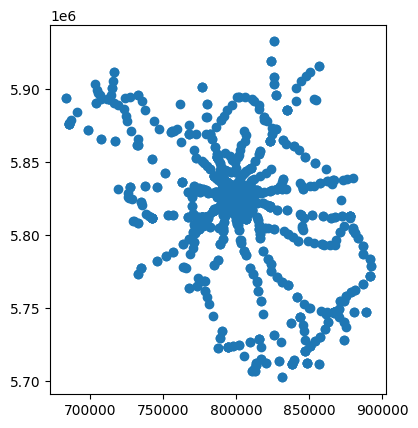

In [42]:
gdf_vbb.plot()

In [43]:
#subset
gdf_vbb = gdf_vbb[["Bauwerk Name", "Bauwerkselement Name", "Bauwerkselement Typ", "geometry"]]

In [44]:
gdf_vbb.head()

,Bauwerk Name,Bauwerkselement Name,Bauwerkselement Typ,geometry
130,"Ahrensfelde, Friedhof Bhf",Bahnsteig Gleis 1,ÖV,POINT (809782.095 5835436.832)
146,"Ahrensfelde, Nord Bhf",Bahnsteig Gleis 1,ÖV,POINT (810309.246 5836607.347)
363,"Alt Rosenthal, Bahnhof",Bahnsteig Gleis 1,ÖV,POINT (857777.543 5835349.029)
364,"Alt Rosenthal, Bahnhof",Bahnsteig Gleis 2,ÖV,POINT (857746.739 5835345.653)
472,"Altdöbern, Bahnhof",Bahnsteig Gleis 1,ÖV,POINT (846451.023 5734281.854)


In [45]:
#gdf_vbb.to_file("gdf_vbb.geojson", driver="GeoJSON")

In [46]:
"""
------------------------------------------------------------------------------
convert df in geodataframe / geometry_400 = lng lat + buffer 500m
------------------------------------------------------------------------------
"""

df["geometry"] = df.apply(lambda row: Point(row["lng"], row["lat"]), axis=1)

gdf = gpd.GeoDataFrame(df, geometry="geometry")

gdf.set_crs(epsg=4326, inplace=True)

gdf = gdf.to_crs(epsg=25832)





<Axes: >

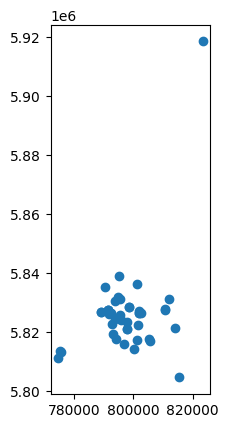

In [47]:
gdf.plot()

In [48]:
#buffer 400m
gdf["geometry_400"] = gdf.geometry.buffer(400)
gdf = gdf.set_geometry("geometry_400")

In [49]:
#intersection
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False) 

result = gpd.sjoin(gdf, gdf_vbb, predicate="intersects")

print(result)

                                                                       id                                                  name shortname                             strasse                      bezirk   plz      plz_ort                                                von                                                bis                                                                                                                                               oeffnungszeiten    Mo    Di    Mi    Do    Fr    Sa             So closed-exc hours-exc    w3                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [50]:
#group by name
result_grouped = (
    result.groupby("name")["Bauwerk Name"] 
    .agg(lambda x: ', '.join(x.unique())) #all results in one column
    .reset_index() 
)
result_grouped.head()

,name,Bauwerk Name
0,A very British Christmas - Your eco-friendly Christmas Fair,U Neu-Westend (Berlin)
1,Adventmarkt in der Leonhardtstraße,S Charlottenburg Bhf (Berlin)
2,Adventsbasar: Miteinander statt nebeneinander,S Blankenburg (Berlin)
3,Adventsmarkt an der Sophienkirche,"S Hackescher Markt (Berlin), U Weinmeisterstr. (Berlin)"
4,Historische Weihnacht - Friedrichshain,S+U Warschauer Str. (Berlin)


In [51]:
#add info from intersection to gdf

#merge
gdf = gdf.merge(result_grouped, on="name", how="left")

gdf = gdf.drop(columns=["geometry_400"])
gdf = gdf.set_geometry("geometry")

gdf.head()


,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen,geometry,Bauwerk Name
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,None,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None,None Berlin,NaT,NaT,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,0,0,0,0,0,0,0,None,None,None,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",None,52.477,13.386,0,0,0,1,0,0,Berlin,None,"die alte feuerwache ist barrierefrei von außen zugänglich, die 6 etage des thf towers ist barrierefrei über einen fahrstuhl zugänglich wintermarkt in der alten feuerwache am thf tower mit: - foodtrucks amp glühwein - handgemachten designobjekten und geschenkideen - weihnachtlicher musik - basteln amp weihnachtsfilme für kinder 6 etage des thf towers\n außerdem findet am 1412 ein großes weihnachtssingen in der ehemaligen haupthalle des flughafen tempelhof statt",POINT (797815.417 5823141.967),U Paradestr. (Berlin)
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,None,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None,None Berlin,05.11.25,23.12.25,LGBTQIA* Winterdays:,None,None,None,None,None,None,None,None,None,None,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",None,52.500,13.353,0,0,0,0,0,0,Berlin,None,"auf dem markt sind holzhecksel gestreut sollten gehandicapte besucher:innen hier hilfe benötigen, spechen sie gerne unsere mitarbeiter an christmas avenue lgbtqia winterdays 2025: glitzer, beats und queere liebe am nollendorfplatz ab dem 5 november starten die lgbtqia winterdays, ab dem 24 november öffnet die christmas avenue berlins einziger queerer weihnachtsmarkt wieder ihre pforten bis 23 dezember wird der nollendorfplatz zum funkelnden treffpunkt für community, freund:innen und familien we

In [52]:
#set short_distance = 1 when "Bauwerk Name" is not NA
gdf.loc[gdf["Bauwerk Name"].notna(), "short_distance"] = 1

gdf.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen,geometry,Bauwerk Name
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,None,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None,None Berlin,NaT,NaT,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,0,0,0,0,0,0,0,None,None,None,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",None,52.477,13.386,0,0,0,1,0,1,Berlin,None,"die alte feuerwache ist barrierefrei von außen zugänglich, die 6 etage des thf towers ist barrierefrei über einen fahrstuhl zugänglich wintermarkt in der alten feuerwache am thf tower mit: - foodtrucks amp glühwein - handgemachten designobjekten und geschenkideen - weihnachtlicher musik - basteln amp weihnachtsfilme für kinder 6 etage des thf towers\n außerdem findet am 1412 ein großes weihnachtssingen in der ehemaligen haupthalle des flughafen tempelhof statt",POINT (797815.417 5823141.967),U Paradestr. (Berlin)
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,None,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None,None Berlin,05.11.25,23.12.25,LGBTQIA* Winterdays:,None,None,None,None,None,None,None,None,None,None,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",None,52.500,13.353,0,0,0,0,0,1,Berlin,None,"auf dem markt sind holzhecksel gestreut sollten gehandicapte besucher:innen hier hilfe benötigen, spechen sie gerne unsere mitarbeiter an christmas avenue lgbtqia winterdays 2025: glitzer, beats und queere liebe am nollendorfplatz ab dem 5 november starten die lgbtqia winterdays, ab dem 24 november öffnet die christmas avenue berlins einziger queerer weihnachtsmarkt wieder ihre pforten bis 23 dezember wird der nollendorfplatz zum funkelnden treffpunkt für community, freund:innen und familien we

In [53]:
#number of "long distance" markets
len(gdf[gdf["short_distance"]==0])

22

In [54]:
#rename column "Bauwerk Name" in "train"
gdf.rename(columns={"Bauwerk Name": "train"}, inplace = True)

gdf.head()

,id,name,shortname,strasse,bezirk,plz,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,ort,formatierteOeffnungszeit,cleanedBemerkungen,geometry,train
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,None,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None,None Berlin,NaT,NaT,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,0,0,0,0,0,0,0,None,None,None,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",None,52.477,13.386,0,0,0,1,0,1,Berlin,None,"die alte feuerwache ist barrierefrei von außen zugänglich, die 6 etage des thf towers ist barrierefrei über einen fahrstuhl zugänglich wintermarkt in der alten feuerwache am thf tower mit: - foodtrucks amp glühwein - handgemachten designobjekten und geschenkideen - weihnachtlicher musik - basteln amp weihnachtsfilme für kinder 6 etage des thf towers\n außerdem findet am 1412 ein großes weihnachtssingen in der ehemaligen haupthalle des flughafen tempelhof statt",POINT (797815.417 5823141.967),U Paradestr. (Berlin)
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,None,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None,None Berlin,05.11.25,23.12.25,LGBTQIA* Winterdays:,None,None,None,None,None,None,None,None,None,None,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",None,52.500,13.353,0,0,0,0,0,1,Berlin,None,"auf dem markt sind holzhecksel gestreut sollten gehandicapte besucher:innen hier hilfe benötigen, spechen sie gerne unsere mitarbeiter an christmas avenue lgbtqia winterdays 2025: glitzer, beats und queere liebe am nollendorfplatz ab dem 5 november starten die lgbtqia winterdays, ab dem 24 november öffnet die christmas avenue berlins einziger queerer weihnachtsmarkt wieder ihre pforten bis 23 dezember wird der nollendorfplatz zum funkelnden treffpunkt für community, freund:innen und familien wenn drau

In [55]:
"""
------------------------------------------------------------------------------
Formatting for the csv file

name	type	purpose	example
id	string	a unique id - must be a number	"1"
shortname	string	name of the market	
strasse	string	street name	
plz_ort	string	post code	
train	string	text about public transport	
image	string	image name including file type e.g. .png	
urheberschaft	string	image copyright text	
von	string	opening date	"17.11.22"
bis	string	closing date	"17.11.22"
Mo	string	opening times Monday	"15:00-22:00"
Di	string	opening times Tuesday	"15:00-22:00"
Mi	string	opening times Wednesday	"15:00-22:00"
Do	string	opening times Thursday	"15:00-22:00"
Fr	string	opening times Friday	"15:00-22:00"
Sa	string	opening times Saturday	"15:00-22:00"
So	string	opening times Sunday	"15:00-22:00"
closed-exc	string	date exeptions	"20.11.22, 24.12.22"
hours-exc	string	time exeptions	"25.12.22=11:00-21:00, 26.12.22=11:00-21:00"
w3	string	market website including https://www.	
bemerkungen	string	some extra text about the market	
lat	number	coordinate	52.5076327
lng	number	coordinate	13.45436119
ignore	string	if you want to ignore the entry	'0' or '1'
immer-kostenlos	string	filter free	'0' or '1'
international	string	filter international	'0' or '1'
barrierefrei	string	filter barrierefrei	'0' or '1'
action	string	filter action	'0' or '1'
short_distance	string	filter short_distance	'0' or '1'

------------------------------------------------------------------------------
"""

'\n------------------------------------------------------------------------------\nFormatting for the csv file\n\nname\ttype\tpurpose\texample\nid\tstring\ta unique id - must be a number\t"1"\nshortname\tstring\tname of the market\t\nstrasse\tstring\tstreet name\t\nplz_ort\tstring\tpost code\t\ntrain\tstring\ttext about public transport\t\nimage\tstring\timage name including file type e.g. .png\t\nurheberschaft\tstring\timage copyright text\t\nvon\tstring\topening date\t"17.11.22"\nbis\tstring\tclosing date\t"17.11.22"\nMo\tstring\topening times Monday\t"15:00-22:00"\nDi\tstring\topening times Tuesday\t"15:00-22:00"\nMi\tstring\topening times Wednesday\t"15:00-22:00"\nDo\tstring\topening times Thursday\t"15:00-22:00"\nFr\tstring\topening times Friday\t"15:00-22:00"\nSa\tstring\topening times Saturday\t"15:00-22:00"\nSo\tstring\topening times Sunday\t"15:00-22:00"\nclosed-exc\tstring\tdate exeptions\t"20.11.22, 24.12.22"\nhours-exc\tstring\ttime exeptions\t"25.12.22=11:00-21:00, 26.12.2

In [56]:
#drop irrelevant columns
gdf.drop(columns=["plz", "ort", "formatierteOeffnungszeit", "cleanedBemerkungen", "geometry"], inplace = True)

gdf.head()


,id,name,shortname,strasse,bezirk,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,train
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,None,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None Berlin,NaT,NaT,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,0,0,0,0,0,0,0,None,None,None,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",None,52.477,13.386,0,0,0,1,0,1,U Paradestr. (Berlin)
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,None,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None Berlin,05.11.25,23.12.25,LGBTQIA* Winterdays:,None,None,None,None,None,None,None,None,None,None,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",None,52.500,13.353,0,0,0,0,0,1,U Nollendorfplatz (Berlin)
2,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/82,30. Weihnachtsmarkt auf Lehmanns Bauernhof,None,Lehmanns Bauernhof \nAlt-Marienfelde 35-37,Tempelhof-Schöneberg,None Berlin,05.12.2025 \n12.12.2025,07.12.2025 \n14.12.2025,Freitag: 14 - 20 Uhr \nSamstag: 12 - 20 Uhr \nSonntag: 12 - 20 Uhr,0,0,0,0,0,0,0,None,None,None,"ebenerdiges Gelände, teilweise Kopfsteinpflaster, mit gut zugänglichen Innenräumen. Auf einem denkmalgeschützten Vierseitenhof, direkt gegenüber der Dorfkirche an der romantischen Dorfaue gelegen, findet zum 30. Mal ein familiär geprägter Weihnachtsmarkt statt. Der Fokus liegt auf Kunsthandwerk und außergewöhnlichen Geschenkidee, ergänzt durch weihnachtliche Gaumengenüsse. Ein Bühnenprogramm, eine Märchenerzählerin sowie Ponyreiten und die Tiere des Hofes runden das Erlebnis bei freiem Eintritt ab.",None,52.413,13.366,0,0,0,1,0,0,NaN
3,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/7,Weihnachtsmarkt Alt-Kaulsdorf,None,Alt-Kaulsdorf Dorfstrasse,Marzahn-Hellersdorf,None Berlin,06.12.25,06.12.25,13-20 Uhr,0,

In [57]:
#date types
gdf.dtypes

id                  object
name                object
shortname           object
strasse             object
bezirk              object
plz_ort             object
von                 object
bis                 object
oeffnungszeiten     object
Mo                  object
Di                  object
Mi                  object
Do                  object
Fr                  object
Sa                  object
So                  object
closed-exc          object
hours-exc           object
w3                  object
bemerkungen         object
bemerkungen_en      object
lat                float64
lng                float64
ignore               int64
immer-kostenlos      int64
international        int64
barrierefrei         int64
action               int64
short_distance       int64
train               object
dtype: object

In [58]:
#adjust date types
gdf[["id", "name", "shortname", "strasse", "bezirk", "plz_ort", "train", "von", "bis", "oeffnungszeiten", 
     "Mo", "Di", "Mi", "Do", "Fr", "Sa", "So", "closed-exc", "hours-exc", "w3", "bemerkungen", "bemerkungen_en", "ignore", "immer-kostenlos", 
     "international", "barrierefrei", "action", "short_distance"]] = gdf[["id", "name", "shortname", "strasse", "bezirk", "plz_ort", "train", "von", "bis", "oeffnungszeiten", 
     "Mo", "Di", "Mi", "Do", "Fr", "Sa", "So", "closed-exc", "hours-exc", "w3", "bemerkungen", "bemerkungen_en", "ignore", "immer-kostenlos", 
     "international", "barrierefrei", "action", "short_distance"]].astype("string")

gdf.dtypes

id                 string[python]
name               string[python]
shortname          string[python]
strasse            string[python]
bezirk             string[python]
plz_ort            string[python]
von                string[python]
bis                string[python]
oeffnungszeiten    string[python]
Mo                 string[python]
Di                 string[python]
Mi                 string[python]
Do                 string[python]
Fr                 string[python]
Sa                 string[python]
So                 string[python]
closed-exc         string[python]
hours-exc          string[python]
w3                 string[python]
bemerkungen        string[python]
bemerkungen_en     string[python]
lat                       float64
lng                       float64
ignore             string[python]
immer-kostenlos    string[python]
international      string[python]
barrierefrei       string[python]
action             string[python]
short_distance     string[python]
train         

In [59]:
#merge with image file
images = pd.read_csv("Weihnachtsmarkt_Bilder.csv")
images["id"] = images["id"].astype("string")
images.drop(columns=["name"], inplace=True) 

xmasData = gdf.merge(images, on="id", how="left")

xmasData.head()


,id,name,shortname,strasse,bezirk,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,train,image,urheberschaft
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,<NA>,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None Berlin,<NA>,<NA>,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,0,0,0,0,0,0,0,<NA>,<NA>,<NA>,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",<NA>,52.477,13.386,0,0,0,1,0,1,U Paradestr. (Berlin),NaN,NaN
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,<NA>,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None Berlin,05.11.25,23.12.25,LGBTQIA* Winterdays:,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",<NA>,52.500,13.353,0,0,0,0,0,1,U Nollendorfplatz (Berlin),NaN,NaN
2,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/82,30. Weihnachtsmarkt auf Lehmanns Bauernhof,<NA>,Lehmanns Bauernhof \nAlt-Marienfelde 35-37,Tempelhof-Schöneberg,None Berlin,05.12.2025 \n12.12.2025,07.12.2025 \n14.12.2025,Freitag: 14 - 20 Uhr \nSamstag: 12 - 20 Uhr \nSonntag: 12 - 20 Uhr,0,0,0,0,0,0,0,<NA>,<NA>,<NA>,"ebenerdiges Gelände, teilweise Kopfsteinpflaster, mit gut zugänglichen Innenräumen. Auf einem denkmalgeschützten Vierseitenhof, direkt gegenüber der Dorfkirche an der romantischen Dorfaue gelegen, findet zum 30. Mal ein familiär geprägter Weihnachtsmarkt statt. Der Fokus liegt auf Kunsthandwerk und außergewöhnlichen Geschenkidee, ergänzt durch weihnachtliche Gaumengenüsse. Ein Bühnenprogramm, eine Märchenerzählerin sowie Ponyreiten und die Tiere des Hofes runden das Erlebnis bei freiem Eintritt ab.",<NA>,52.413,13.366,0,0,0,1,0,0,<NA>,NaN,NaN
3,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/7,Weihnachtsmarkt Alt-Kaulsdorf,<NA>,Alt-Kaulsdorf Dorfstrasse,Marzahn-Hellers

In [60]:
#case: missing images
condition = xmasData["image"].isna()

xmasData.loc[condition, "image"] = "placeholder.png"
xmasData.loc[condition, "urheberschaft"] = "freestocks.org, CC BY-SA 4.0 via Wikimedia Commons"

xmasData.head()


,id,name,shortname,strasse,bezirk,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,train,image,urheberschaft
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,<NA>,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None Berlin,<NA>,<NA>,2. Adventswochenende: 05. bis 07.12.2025 \n3. Adventswochenende: 12. bis 14.12.2025 \n\nFreitags 15:00 – 20:00 Uhr \nSamstags und Sonntags 12:00 – 20:00 Uhr,0,0,0,0,0,0,0,<NA>,<NA>,<NA>,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs)\n Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",<NA>,52.477,13.386,0,0,0,1,0,1,U Paradestr. (Berlin),placeholder.png,"freestocks.org, CC BY-SA 4.0 via Wikimedia Commons"
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,<NA>,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None Berlin,05.11.25,23.12.25,LGBTQIA* Winterdays:,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene.\n Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. \n Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab.\n Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",<NA>,52.500,13.353,0,0,0,0,0,1,U Nollendorfplatz (Berlin),placeholder.png,"freestocks.org, CC BY-SA 4.0 via Wikimedia Commons"
2,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/82,30. Weihnachtsmarkt auf Lehmanns Bauernhof,<NA>,Lehmanns Bauernhof \nAlt-Marienfelde 35-37,Tempelhof-Schöneberg,None Berlin,05.12.2025 \n12.12.2025,07.12.2025 \n14.12.2025,Freitag: 14 - 20 Uhr \nSamstag: 12 - 20 Uhr \nSonntag: 12 - 20 Uhr,0,0,0,0,0,0,0,<NA>,<NA>,<NA>,"ebenerdiges Gelände, teilweise Kopfsteinpflaster, mit gut zugänglichen Innenräumen. Auf einem denkmalgeschützten Vierseitenhof, direkt gegenüber der Dorfkirche an der romantischen Dorfaue gelegen, findet zum 30. Mal ein familiär geprägter Weihnachtsmarkt statt. Der Fokus liegt auf Kunsthandwerk und außergewöhnlichen Geschenkidee, ergänzt durch weihnachtliche Gaumengenüsse. Ein Bühnenprogramm, eine Märchenerzählerin sowie Ponyreiten und die Tiere des Hofes runden das Erlebnis bei freiem Eintritt ab.",<NA>,52.413,13.366,0,0,0,1,0,0,<NA>,placeholder.png,"freestocks.org,

In [61]:
#Zeilenumbrüche entfernen, damit csv richtig generiert wird
import pandas as pd
obj_cols = xmasData.select_dtypes(include=["object", "string"]).columns

xmasData = xmasData.replace(r"[\r\n]+", " | ", regex=True)


In [62]:
# Prüfen ob noch Zeilenumbrüche drin sind
counts = xmasData.apply(
    lambda s: s.astype(str).str.contains(r"[\r\n]", na=False).sum()
).sort_values(ascending=False)

for col, n in counts.items():
    print(f"{col}: {n} Zeilen mit Umbruch")

id: 0 Zeilen mit Umbruch
name: 0 Zeilen mit Umbruch
image: 0 Zeilen mit Umbruch
train: 0 Zeilen mit Umbruch
short_distance: 0 Zeilen mit Umbruch
action: 0 Zeilen mit Umbruch
barrierefrei: 0 Zeilen mit Umbruch
international: 0 Zeilen mit Umbruch
immer-kostenlos: 0 Zeilen mit Umbruch
ignore: 0 Zeilen mit Umbruch
lng: 0 Zeilen mit Umbruch
lat: 0 Zeilen mit Umbruch
bemerkungen_en: 0 Zeilen mit Umbruch
bemerkungen: 0 Zeilen mit Umbruch
w3: 0 Zeilen mit Umbruch
hours-exc: 0 Zeilen mit Umbruch
closed-exc: 0 Zeilen mit Umbruch
So: 0 Zeilen mit Umbruch
Sa: 0 Zeilen mit Umbruch
Fr: 0 Zeilen mit Umbruch
Do: 0 Zeilen mit Umbruch
Mi: 0 Zeilen mit Umbruch
Di: 0 Zeilen mit Umbruch
Mo: 0 Zeilen mit Umbruch
oeffnungszeiten: 0 Zeilen mit Umbruch
bis: 0 Zeilen mit Umbruch
von: 0 Zeilen mit Umbruch
plz_ort: 0 Zeilen mit Umbruch
bezirk: 0 Zeilen mit Umbruch
strasse: 0 Zeilen mit Umbruch
shortname: 0 Zeilen mit Umbruch
urheberschaft: 0 Zeilen mit Umbruch


In [63]:
xmasData.head(30)

,id,name,shortname,strasse,bezirk,plz_ort,von,bis,oeffnungszeiten,Mo,Di,Mi,Do,Fr,Sa,So,closed-exc,hours-exc,w3,bemerkungen,bemerkungen_en,lat,lng,ignore,immer-kostenlos,international,barrierefrei,action,short_distance,train,image,urheberschaft
0,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/109,Winter am THF,<NA>,THF TOWER - Flughafen Tempelhof,Tempelhof-Schöneberg,None Berlin,<NA>,<NA>,2. Adventswochenende: 05. bis 07.12.2025 | 3. Adventswochenende: 12. bis 14.12.2025 | Freitags 15:00 – 20:00 Uhr | Samstags und Sonntags 12:00 – 20:00 Uhr,0,0,0,0,0,0,0,<NA>,<NA>,<NA>,"Die Alte Feuerwache ist barrierefrei von außen zugänglich, die 6. Etage des THF TOWERs ist barrierefrei über einen Fahrstuhl zugänglich. Wintermarkt in der Alten Feuerwache am THF TOWER mit: - Foodtrucks &amp; Glühwein - Handgemachten Designobjekten und Geschenkideen - Weihnachtlicher Musik - Basteln &amp; Weihnachtsfilme für Kinder (6. Etage des THF TOWERs) | Außerdem findet am 14.12. ein großes Weihnachtssingen in der ehemaligen Haupthalle des Flughafen Tempelhof statt!",<NA>,52.477,13.386,0,0,0,1,0,1,U Paradestr. (Berlin),placeholder.png,"freestocks.org, CC BY-SA 4.0 via Wikimedia Commons"
1,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/118,LGBT*Winterdays und Christmas Avenue Nollendorfplatz,<NA>,Nollendorfplatz unter der Hochbahn,Tempelhof-Schöneberg,None Berlin,05.11.25,23.12.25,LGBTQIA* Winterdays:,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"auf dem Markt sind Holzhecksel gestreut. Sollten gehandicapte Besucher:innen hier Hilfe benötigen, spechen sie gerne unsere Mitarbeiter an Christmas Avenue & LGBTQIA Winterdays 2025: Glitzer, Beats und queere Liebe am Nollendorfplatz* Ab dem 5. November starten die LGBTQIA Winterdays*, ab dem 24. November öffnet die CHRISTMAS AVENUE – Berlins einziger queerer Weihnachtsmarkt – wieder ihre Pforten. Bis 23. Dezember wird der Nollendorfplatz zum funkelnden Treffpunkt für Community, Freund:innen und Familien. Wenn draußen das Grau regiert, leuchtet unter der Hochbahn ein Ort voller Glitzer, Wärme und Miteinander: Die Christmas Avenue wird auch 2025 wieder das weihnachtliche Wohnzimmer der queeren Szene. | Zum Start lädt Drag-Queen Margot Schlönzke am 5. November zum legendären Drag-Bingo. Danach sorgen Live-Musik, Drag-Shows, Karaoke und die heißesten DJs der Szene für Partylaune – von House bis Pop. Berlins bekannteste Drag-Performerinnen übernehmen Moderation und Bühne. Dazu gibt’s kulinarische Highlights, Kunst, Design & Manufaktur-Stände, wettergeschützte Gemütlichkeit unter der Hochbahn – und jede Menge queere Sichtbarkeit: Vereine und Initiativen präsentieren ihre Arbeit, sammeln Spenden und laden zum Austausch ein. Für Gruppen gibt es eine Partyhütte zum Mieten. | Wöchentliche Specials wie Happy Hour (Mo), After Work (Do) und Aperol o’Clock (So) runden das Programm ab. | Fotos können auf unsere Homepage zur freien Verfügung runtergeladen werden.",<NA>,52.500,13.353,0,0,0,0,0,1,U Nollendorfplatz (Berlin),placeholder.png,"freestocks.org, CC BY-SA 4.0 via Wikimedia Commons"
2,/sen/web/service/maerkte-feste/weihnachtsmaerkte/index.php/detail/82,30. Weihnachtsmarkt auf Lehmanns Bauernhof,<NA>,Lehmanns Bauernhof | Alt-Marienfelde 35-37,Tempelhof-Schöneberg,None Berlin,05.12.2025 | 12.12.2025,07.12.2025 | 14.12.2025,Freitag: 14 - 20 Uhr | Samstag: 12 - 20 Uhr | Sonntag: 12 - 20 Uhr,0,0,0,0,0,0,0,<NA>,<NA>,<NA>,"ebenerdiges Gelände, teilweise Kopfsteinpflaster, mit gut zugänglichen Innenräumen. Auf einem denkmalgeschützten Vierseitenhof, direkt gegenüber der Dorfkirche an der romantischen Dorfaue gelegen, findet zum 30. Mal ein familiär geprägter Weihnachtsmarkt statt. Der Fokus liegt auf Kunsthandwerk und außergewöhnlichen Geschenkidee, ergänzt durch weihnachtliche Gaumengenüsse. Ein Bühnenprogramm, eine Märchenerzählerin sowie Ponyreiten und die Tiere des Hofes runden das Erlebnis bei freiem Eintritt ab.",<NA>,52.413,13.366,0,0,0,1,0,0,<NA>,placeholder.png,"freestocks.org, CC

In [64]:
#csv

xmasData.to_csv("markets_2025.csv", index= False, sep=";")
